<a href="https://colab.research.google.com/github/Nikhil18207/Graident-Descent-Learning/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [2]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + np.random.randn(200,1)

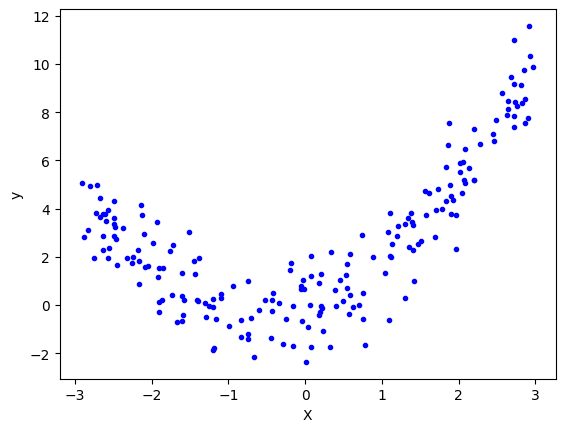

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
reg  =LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("the accuracy by using simple linear regression is",r2_score(y_test,y_pred))

the accuracy by using simple linear regression is 0.180441176415574


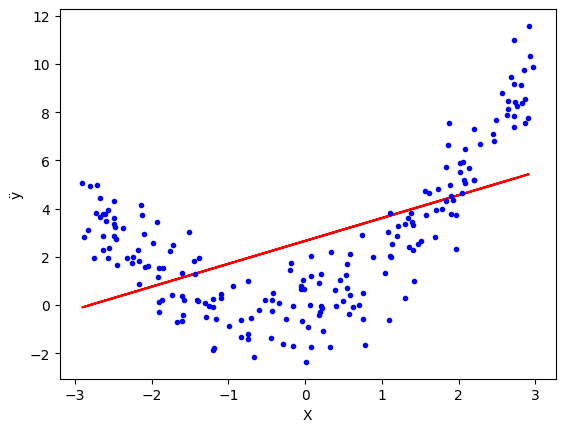

In [10]:
plt.plot(X_train,reg.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("ÿ")
plt.show()

In [16]:
poly = PolynomialFeatures(degree=2,include_bias =True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [17]:
print(X_train[0])
print(X_train_trans[0])

[2.7318829]
[1.         2.7318829  7.46318418]


In [18]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred_trans = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.180441176415574

In [19]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89496755 0.86182893]]
[-0.09141821]


In [20]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

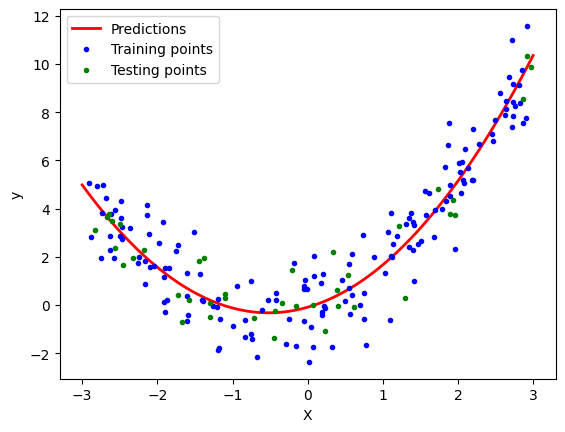

In [21]:
plt.plot(X_new,y_new,'r-',linewidth = 2,label='Predictions')
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,'g.',label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()